<p>Data fields

N - ratio of Nitrogen content in soil <br>
P - ratio of Phosphorous content in soil<br>
K - ratio of Potassium content in soil<br>
temperature - temperature in degree Celsius<br>
humidity - relative humidity in %<br>
ph - ph value of the soil<br>
rainfall - rainfall in mm<br>
Here a model is trained from these historical recommendations, in order to provide an autonomous crop selection based on the above variables.</p>

In [124]:
# Importing libraries
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics 
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [125]:
#pip install -U scikit-learn

In [126]:

print(sklearn.__version__) 

0.24.2


In [127]:
# Load dataset
url = "Crop_recommendations.csv"
dataset = read_csv(url)

In [128]:
# shape
print(dataset.shape)

(2499, 8)


In [129]:
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.88,82.00,6.50,202.94,rice
1,85.0,58.0,41.0,21.77,80.32,7.04,226.66,rice
2,60.0,55.0,44.0,23.00,82.32,7.84,263.96,rice
3,74.0,35.0,40.0,26.49,80.16,6.98,242.86,rice
4,78.0,42.0,42.0,20.13,81.60,7.63,262.72,rice
5,69.0,37.0,42.0,23.06,83.37,7.07,251.05,rice
6,69.0,55.0,38.0,22.71,82.64,5.70,271.32,rice
7,94.0,53.0,40.0,20.28,82.89,5.72,241.97,rice
8,89.0,54.0,38.0,24.52,83.54,6.69,230.45,rice
9,68.0,58.0,38.0,23.22,83.03,6.34,221.21,rice


In [130]:
dataset.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2489,79.0,45.0,43.0,NaN,79.16,7.17,187.17,jute
2490,84.0,40.0,NaN,25.01,88.33,7.23,169.42,jute
2491,98.0,NaN,35.0,25.41,76.44,7.32,188.64,jute
2492,NaN,24.0,33.0,26.54,67.10,6.81,120.65,coffee
2493,86.0,NaN,35.0,27.01,60.77,6.49,191.45,coffee
2494,88.0,35.0,NaN,27.56,58.46,6.78,117.94,coffee
2495,84.0,27.0,29.0,NaN,53.00,7.17,168.26,coffee
2496,120.0,40.0,33.0,24.24,NaN,6.73,115.16,coffee
2497,106.0,40.0,30.0,23.43,64.11,NaN,122.68,coffee
2498,113.0,21.0,33.0,26.02,55.83,7.28,NaN,coffee


In [131]:
#22 Unique values that can be determined or predicted
len(set(dataset['label']))

22

In [132]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [133]:
print(dataset.describe())

                 N            P  ...           ph     rainfall
count  2468.000000  2449.000000  ...  2458.000000  2480.000000
mean     50.416937    53.446713  ...     6.480183   103.858835
std      36.404307    32.503854  ...     0.773014    55.558687
min       0.000000     5.000000  ...     3.500000    20.210000
25%      22.000000    29.000000  ...     5.980000    64.237500
50%      37.000000    52.000000  ...     6.440000    94.450000
75%      83.000000    67.000000  ...     6.920000   126.302500
max     140.000000   145.000000  ...     9.940000   298.560000

[8 rows x 7 columns]


<h3>Checking for missing values</h3>

In [134]:
dataset.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2494,False,False,True,False,False,False,False,False
2495,False,False,False,True,False,False,False,False
2496,False,False,False,False,True,False,False,False
2497,False,False,False,False,False,True,False,False


In [135]:
dataset.count()

N              2468
P              2449
K              2445
temperature    2443
humidity       2445
ph             2458
rainfall       2480
label          2499
dtype: int64

In [136]:
dataset['label'].value_counts()

papaya         171
coconut        118
watermelon     117
mothbeans      117
chickpea       116
mungbean       115
blackgram      114
rice           113
kidneybeans    112
mango          112
maize          112
pigeonpeas     110
cotton         110
apple          110
lentil         109
pomegranate    108
banana         108
muskmelon      108
coffee         107
grapes         107
jute           105
orange         100
Name: label, dtype: int64

In [137]:
#CHECKING NO OF MISSING VALUES IN DATASETS
dataset.isnull().sum()

N              31
P              50
K              54
temperature    56
humidity       54
ph             41
rainfall       19
label           0
dtype: int64

<h2>Addressing the missing values</h2>

<h3>For Nitrogen</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


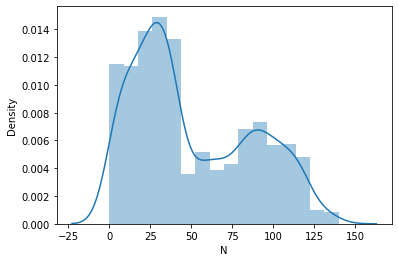

In [138]:
sns.distplot(dataset.N)

As the nitrogen data is not evenly distributed so taking mean for adding in missing value is not efficient so we are taking median as it is somewhat right skwed 


In [139]:
#filling missing data of nitrogen with median 
dataset.fillna(dataset.N.median(),inplace=True)

In [140]:
#no of missing value after filling with median
dataset.N.isnull().sum()

0

For Phosphorous



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


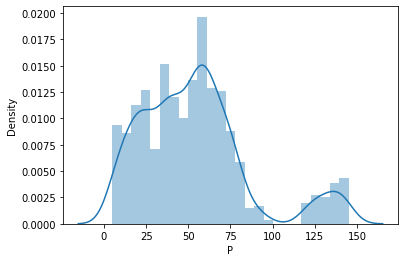

In [141]:
sns.distplot(dataset.P)

As there has certain outliers in the data plot so it is efficient to use median instead of mean,as mean is heavily influenced by the outlier which will not give efficient result

In [142]:
#filling missing data of phosphrous with median 
dataset.fillna(dataset.P.median(),inplace=True)

In [143]:
#no of missing value after filling with median
dataset.P.isnull().sum()

0

For Potassium

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


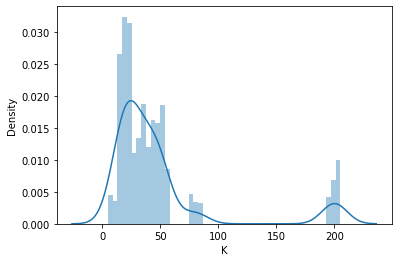

In [144]:
sns.distplot(dataset.K)

Like phosphorous here is also outlier so mean is not effective ,but the mode is really good in this data as the frequency is really high

In [145]:
#filling missing data of potassium with mode
dataset.fillna(dataset.K.mode(),inplace=True)

In [146]:
#no of missing value after filling with mode
dataset.K.isnull().sum()

0

For Temperature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


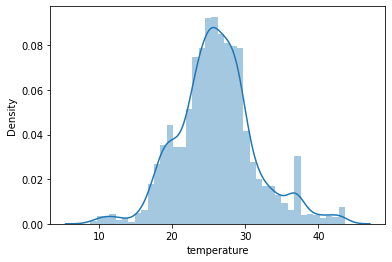

In [147]:
sns.distplot(dataset.temperature)

here the data is evenly distributed so mean is used for filling missing values 

In [148]:
#filling missing data of temperature with mean
dataset.fillna(dataset.K.mean(),inplace=True)

In [149]:
#no of missing value after filling with mode
dataset.temperature.isnull().sum()

0

For Humidity

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


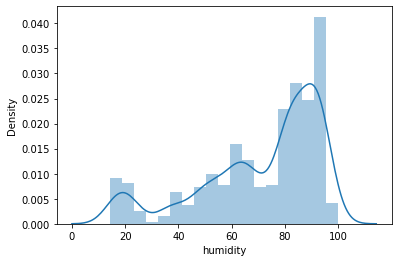

In [150]:
sns.distplot(dataset.humidity)

Here the distribution is left skewed so using median is the best for filling missing values 

In [151]:
#filling missing data of humidity with median 
dataset.fillna(dataset.humidity.median(),inplace=True)

In [152]:
#no of missing value after filling with mode
dataset.temperature.isnull().sum()

0

For PH

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


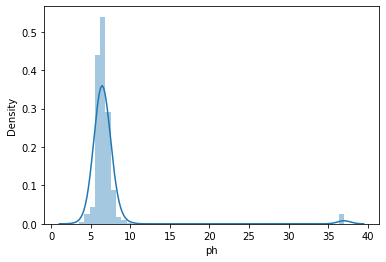

In [153]:
sns.distplot(dataset.ph)

As the data is normally distributed,so mean is used to fill in missing values 

In [154]:
#filling missing data of temperature with mean
dataset.fillna(dataset.ph.mean(),inplace=True)

In [155]:
#no of missing value after filling with mean
dataset.ph.isnull().sum()

0

For Rainfall

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


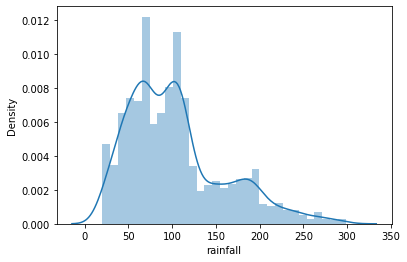

In [156]:
sns.distplot(dataset.rainfall)

As the distribution is right skewed so median is used for filling in missing data .

In [157]:
#filling missing data of rainfall with median 
dataset.fillna(dataset.rainfall.median(),inplace=True)

In [158]:
#no of missing value after filling with mean
dataset.ph.isnull().sum()

0

In [159]:
#CHECKING NO OF MISSING VALUES IN DATASET AFTER FILLING IN MISSING VALUES
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [160]:
dataset.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2489,79.0,45.0,43.0,37.00,79.16,7.17,187.17,jute
2490,84.0,40.0,37.0,25.01,88.33,7.23,169.42,jute
2491,98.0,37.0,35.0,25.41,76.44,7.32,188.64,jute
2492,37.0,24.0,33.0,26.54,67.10,6.81,120.65,coffee
2493,86.0,37.0,35.0,27.01,60.77,6.49,191.45,coffee
2494,88.0,35.0,37.0,27.56,58.46,6.78,117.94,coffee
2495,84.0,27.0,29.0,37.00,53.00,7.17,168.26,coffee
2496,120.0,40.0,33.0,24.24,37.00,6.73,115.16,coffee
2497,106.0,40.0,30.0,23.43,64.11,37.00,122.68,coffee
2498,113.0,21.0,33.0,26.02,55.83,7.28,37.00,coffee


<h3> Data Visualization </h3>

As the distribution is right 

Text(0.5, 0, 'crops')

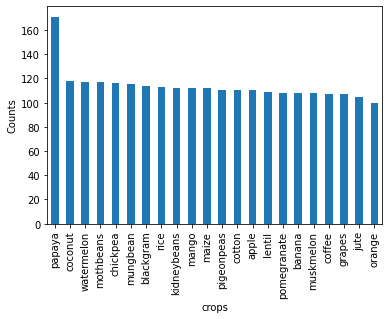

In [161]:
ax = dataset['label'].value_counts().plot(kind='bar')
ax.set_ylabel("Counts")
ax.set_xlabel("crops")

#This shows that the labels are evenly distributed and no class imbalance

In [162]:
dataset.corr(method="pearson")

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.227089,-0.138314,0.013375,0.187278,0.003861,0.051795
P,-0.227089,1.000000,0.727693,-0.111922,-0.114259,-0.019935,-0.061832
K,-0.138314,0.727693,1.000000,-0.140030,0.178798,-0.032406,-0.050099
temperature,0.013375,-0.111922,-0.140030,1.000000,0.203262,0.065065,-0.009452
humidity,0.187278,-0.114259,0.178798,0.203262,1.000000,0.011225,0.101691
ph,0.003861,-0.019935,-0.032406,0.065065,0.011225,1.000000,0.002933
rainfall,0.051795,-0.061832,-0.050099,-0.009452,0.101691,0.002933,1.000000


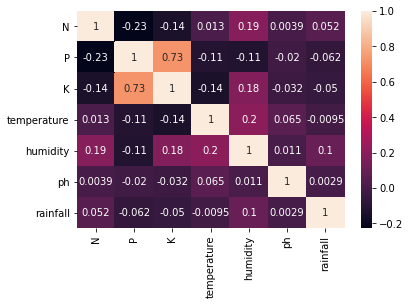

In [163]:
sns.heatmap(dataset.corr(),annot=True)
#heatmap used for data visualization which is called via importing seaborn package . Seaborn is similiar to matplotlib used for data visualization

<h3> Standardization </h3>

In [164]:
#scaling = StandardScaler()
#X=scaling.fit_transform(dataset[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']])
X=dataset[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Y=dataset['label']

In [165]:
# Split data 70%-30% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 12243, rows
Test Set: 5250 rows


In [166]:
acc = []
model = []

<h3> Decision Tree Algorithm</h3>

In [167]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree =Pipeline([('m',DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5))]) #random state???????????

DecisionTree.fit(X_train,Y_train)#training our model with train data 

predicted_values = DecisionTree.predict(X_test)#predicting the Xtest after being trained with Xtrain

x = metrics.accuracy_score(Y_test, predicted_values)#comparing the predicted value with actual result ie (Ytest) and finding the accuracy

acc.append(x)
model.append(('Decision Tree',DecisionTree))
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))#used to print the classification report ie precision,recall,f1score and accuracy

DecisionTrees's Accuracy is:  89.33333333333333
              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        30
      banana       0.74      0.98      0.84        44
   blackgram       0.73      0.93      0.82        41
    chickpea       0.97      0.97      0.97        35
     coconut       1.00      0.90      0.95        40
      coffee       1.00      0.91      0.95        33
      cotton       1.00      0.87      0.93        23
      grapes       1.00      0.93      0.96        27
        jute       0.69      1.00      0.82        25
 kidneybeans       1.00      0.83      0.91        29
      lentil       0.87      0.90      0.89        30
       maize       0.77      0.96      0.86        28
       mango       0.96      0.87      0.91        30
   mothbeans       0.76      0.44      0.56        36
    mungbean       1.00      0.94      0.97        33
   muskmelon       1.00      1.00      1.00        33
      orange       0.97      1.00

In [168]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, X, Y,cv=5)#cv=no of folds in cross validation,X and Y are the 7 parameters and the label

print(score)

[0.944      0.932      0.93       0.896      0.75551102]


<h3>Gaussian Naive Bayes algorithm</h3>

In [169]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = Pipeline([('m',GaussianNB())])

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append(('Naive Bayes',NaiveBayes))
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Naive Bayes's Accuracy is:  0.944
              precision    recall  f1-score   support

       apple       0.96      0.90      0.93        30
      banana       1.00      0.95      0.98        44
   blackgram       0.95      0.85      0.90        41
    chickpea       1.00      0.97      0.99        35
     coconut       1.00      0.97      0.99        40
      coffee       1.00      1.00      1.00        33
      cotton       0.87      0.87      0.87        23
      grapes       0.93      0.93      0.93        27
        jute       0.80      0.96      0.87        25
 kidneybeans       0.97      1.00      0.98        29
      lentil       1.00      0.90      0.95        30
       maize       0.93      0.89      0.91        28
       mango       0.97      0.97      0.97        30
   mothbeans       0.77      0.94      0.85        36
    mungbean       1.00      0.94      0.97        33
   muskmelon       1.00      0.97      0.98        33
      orange       1.00      1.00      1.00    

In [170]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,X,Y,cv=5)
score

array([0.992     , 0.98      , 0.986     , 0.97      , 0.78356713])

<h3>Support vector classifier (SVM)</h3>

In [171]:
SVM = Pipeline([('m',SVC(kernel='linear',gamma='auto'))])#gamma parameter????????????????????

SVM.fit(X_train,Y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append(('SVM',SVM))
print("SVM's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

SVM's Accuracy is:  0.952
              precision    recall  f1-score   support

       apple       1.00      0.90      0.95        30
      banana       0.98      0.98      0.98        44
   blackgram       0.90      0.93      0.92        41
    chickpea       1.00      1.00      1.00        35
     coconut       0.97      0.97      0.97        40
      coffee       0.97      1.00      0.99        33
      cotton       0.91      0.87      0.89        23
      grapes       0.93      0.96      0.95        27
        jute       0.82      0.92      0.87        25
 kidneybeans       0.97      0.97      0.97        29
      lentil       0.96      0.87      0.91        30
       maize       0.96      0.93      0.95        28
       mango       0.97      1.00      0.98        30
   mothbeans       0.80      0.92      0.86        36
    mungbean       0.97      0.94      0.95        33
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00      1.00        29
 

In [172]:
# Cross validation score (SVM)
score = cross_val_score(SVM,X,Y,cv=5)
score

array([0.976     , 0.974     , 0.99      , 0.966     , 0.87374749])

<h3>Logistic Regression </h3>


In [173]:

from sklearn.linear_model import LogisticRegression


LogReg = Pipeline([('m',LogisticRegression(random_state=2,solver='liblinear',max_iter=1000))])

LogReg.fit(X_train,Y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append(('Logistic Regression',LogReg))
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Logistic Regression's Accuracy is:  0.8946666666666667
              precision    recall  f1-score   support

       apple       1.00      0.87      0.93        30
      banana       0.91      0.95      0.93        44
   blackgram       0.82      0.80      0.81        41
    chickpea       0.97      0.91      0.94        35
     coconut       1.00      0.88      0.93        40
      coffee       0.94      0.97      0.96        33
      cotton       0.84      0.91      0.87        23
      grapes       1.00      0.96      0.98        27
        jute       0.57      0.52      0.54        25
 kidneybeans       0.90      0.97      0.93        29
      lentil       0.92      0.80      0.86        30
       maize       0.92      0.79      0.85        28
       mango       0.88      1.00      0.94        30
   mothbeans       0.78      0.86      0.82        36
    mungbean       0.94      0.94      0.94        33
   muskmelon       1.00      1.00      1.00        33
      orange       1.00   

<h3>K Nearest Neighbours (KNN)</h3>

In [174]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline([('m',KNeighborsClassifier(n_neighbors=5))])

KNN.fit(X_train,Y_train)

predicted_values = KNN.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append(('KNN',KNN))
print("KNN's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))


KNN's Accuracy is:  0.956
              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        30
      banana       0.98      0.95      0.97        44
   blackgram       0.93      0.95      0.94        41
    chickpea       1.00      0.97      0.99        35
     coconut       1.00      0.93      0.96        40
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      0.96      0.98        27
        jute       0.75      0.84      0.79        25
 kidneybeans       0.91      1.00      0.95        29
      lentil       1.00      0.87      0.93        30
       maize       1.00      1.00      1.00        28
       mango       0.97      1.00      0.98        30
   mothbeans       0.83      0.97      0.90        36
    mungbean       1.00      0.94      0.97        33
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00      1.00        29
 

<h3> Ensembling five Algorithms using voting classifier based on majority voting </h3>

In [175]:
ensemble = VotingClassifier(estimators=model, voting='hard')

In [176]:
model

[('Decision Tree', Pipeline(steps=[('m',
                   DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                          random_state=2))])),
 ('Naive Bayes', Pipeline(steps=[('m', GaussianNB())])),
 ('SVM', Pipeline(steps=[('m', SVC(gamma='auto', kernel='linear'))])),
 ('Logistic Regression', Pipeline(steps=[('m',
                   LogisticRegression(max_iter=1000, random_state=2,
                                      solver='liblinear'))])),
 ('KNN', Pipeline(steps=[('m', KNeighborsClassifier())]))]

In [177]:

ensemble.fit(X_train,Y_train)

predicted_values = ensemble.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)

print("ensemble's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

ensemble's Accuracy is:  0.9613333333333334
              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        30
      banana       1.00      0.98      0.99        44
   blackgram       0.92      0.88      0.90        41
    chickpea       1.00      0.97      0.99        35
     coconut       1.00      0.97      0.99        40
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.91      0.95        23
      grapes       1.00      0.96      0.98        27
        jute       0.83      0.96      0.89        25
 kidneybeans       0.97      1.00      0.98        29
      lentil       1.00      0.90      0.95        30
       maize       0.97      1.00      0.98        28
       mango       0.97      1.00      0.98        30
   mothbeans       0.81      0.94      0.87        36
    mungbean       1.00      0.94      0.97        33
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00    

In [178]:
data = np.array([[31, 55, 22, 22, 21, 5.0, 109.9]])
prediction =DecisionTree.predict(data)
prediction1 =SVM.predict(data)
prediction2 =KNN.predict(data)
prediction3 =LogReg.predict(data)
prediction4 =NaiveBayes.predict(data)
prediction5 =ensemble.predict(data)
print(prediction,prediction1,prediction2,prediction3,prediction4,prediction5)

['kidneybeans'] ['kidneybeans'] ['kidneybeans'] ['kidneybeans'] ['kidneybeans'] ['kidneybeans']


In [179]:
data = np.array([[90, 42, 43, 20.8, 82, 6.5, 202.9]])
prediction =DecisionTree.predict(data)
prediction1 =SVM.predict(data)
prediction2 =KNN.predict(data)
prediction3 =LogReg.predict(data)
prediction4 =NaiveBayes.predict(data)
prediction5 =ensemble.predict(data)
print(prediction,prediction1,prediction2,prediction3,prediction4,prediction5)

['rice'] ['rice'] ['rice'] ['rice'] ['rice'] ['rice']


<img src='Desktop/Model_sketch.png'>
<center>System Architecture</center>

In [180]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
Ensemble_pkl_filename = 'Ensemble.pkl'
# Open the file to save as pkl file
Ensemble_Model_pkl = open(Ensemble_pkl_filename, 'wb')
pickle.dump(ensemble, Ensemble_Model_pkl)
# Close the pickle instances
Ensemble_Model_pkl.close()